<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter04_getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.keras.backend.set_floatx('float16')

## 4.1.1 IMBD 데이터셋

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
											partial_y_train,
											epochs=20,
											batch_size=512,
											validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 66ms/step - loss: 0.5557 - accuracy: 0.7783 - val_loss: 0.4360 - val_accuracy: 0.8584
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3586 - accuracy: 0.8862 - val_loss: 0.3464 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2715 - accuracy: 0.9111 - val_loss: 0.2949 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2214 - accuracy: 0.9243 - val_loss: 0.2834 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1888 - accuracy: 0.9346 - val_loss: 0.2993 - val_accuracy: 0.8770
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1646 - accuracy: 0.9438 - val_loss: 0.2781 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1460 - accuracy: 0.9517 - val_loss: 0.2893 - val_accuracy: 0.8862
Epoch 8/20
30

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

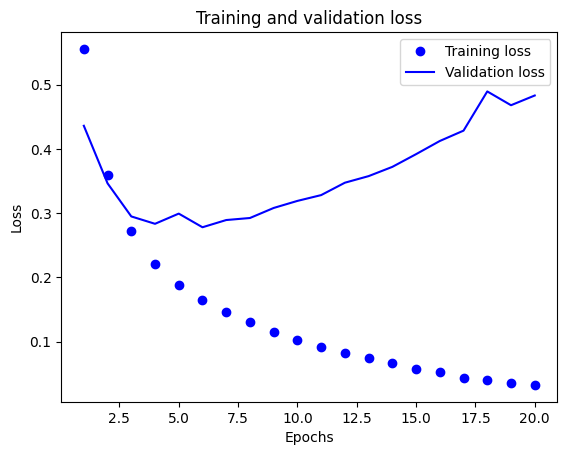

In [13]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

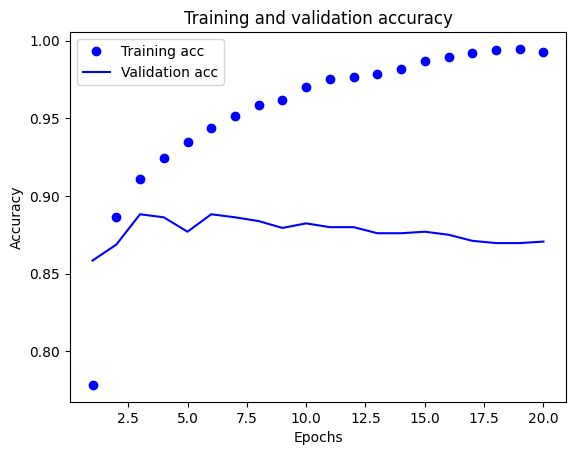

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# 훈련세트 + 검증세트
model.compile(optimizer="rmsprop",
								loss="binary_crossentropy",
								metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4744 - accuracy: 0.8203
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2817 - accuracy: 0.9014
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2203 - accuracy: 0.9204
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2832 - accuracy: 0.9199


In [16]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.1697 ],
       [1.     ],
       [0.713  ],
       ...,
       [0.0818 ],
       [0.06757],
       [0.5938 ]], dtype=float16)